# Generating Shakespeares Language

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv('shakespeare.txt',delimiter='\n',header=None)
data.columns = ['text']
data

,text
0,"FROM fairest creatures we desire increase,"
1,"That thereby beauty's rose might never die,"
2,"But as the riper should by time decease,"
3,His tender heir might bear his memory:
4,"But thou, contracted to thine own bright eyes,"
...,...
2151,"Which from Love's fire took heat perpetual,"
2152,Growing a bath and healthful remedy
2153,"For men diseased; but I, my mistress' thrall,"
2154,"Came there for cure, and this by that I prove,"


In [6]:
data.shape

(2156, 1)

In [7]:
# This code is related to limiting the tensorflow GPU ---------------------------
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.models import Sequential

In [13]:
corpus = data['text'].str.lower().values.tolist()
corpus

['from fairest creatures we desire increase,',
 "that thereby beauty's rose might never die,",
 'but as the riper should by time decease,',
 'his tender heir might bear his memory:',
 'but thou, contracted to thine own bright eyes,',
 "feed'st thy light'st flame with self-substantial fuel,",
 'making a famine where abundance lies,',
 'thyself thy foe, to thy sweet self too cruel.',
 "thou that art now the world's fresh ornament",
 'and only herald to the gaudy spring,',
 'within thine own bud buriest thy content',
 'and, tender churl, makest waste in niggarding.',
 'pity the world, or else this glutton be,',
 "to eat the world's due, by the grave and thee.",
 'when forty winters shall beseige thy brow,',
 "and dig deep trenches in thy beauty's field,",
 "thy youth's proud livery, so gazed on now,",
 "will be a tatter'd weed, of small worth held:",
 "then being ask'd where all thy beauty lies,",
 'where all the treasure of thy lusty days,',
 'to say, within thine own deep-sunken eyes,',

In [16]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

#print(tokenizer.word_index)
#print(len(tokenizer.word_index))

In [26]:
corpus[0]

'from fairest creatures we desire increase,'

In [27]:
input_sequences = []
for line in corpus :
    seq = tokenizer.texts_to_sequences([line])[0]
    
    for i in range(1,len(seq)):
        n_gram_seq = seq[:i+1]
        input_sequences.append(n_gram_seq)
        
input_sequences
    
    

[[34, 417],
 [34, 417, 877],
 [34, 417, 877, 166],
 [34, 417, 877, 166, 213],
 [34, 417, 877, 166, 213, 517],
 [8, 878],
 [8, 878, 134],
 [8, 878, 134, 351],
 [8, 878, 134, 351, 102],
 [8, 878, 134, 351, 102, 156],
 [8, 878, 134, 351, 102, 156, 199],
 [16, 22],
 [16, 22, 2],
 [16, 22, 2, 879],
 [16, 22, 2, 879, 61],
 [16, 22, 2, 879, 61, 30],
 [16, 22, 2, 879, 61, 30, 48],
 [16, 22, 2, 879, 61, 30, 48, 634],
 [25, 311],
 [25, 311, 635],
 [25, 311, 635, 102],
 [25, 311, 635, 102, 200],
 [25, 311, 635, 102, 200, 25],
 [25, 311, 635, 102, 200, 25, 278],
 [16, 10],
 [16, 10, 880],
 [16, 10, 880, 3],
 [16, 10, 880, 3, 62],
 [16, 10, 880, 3, 62, 85],
 [16, 10, 880, 3, 62, 85, 214],
 [16, 10, 880, 3, 62, 85, 214, 53],
 [1372, 9],
 [1372, 9, 1373],
 [1372, 9, 1373, 636],
 [1372, 9, 1373, 636, 11],
 [1372, 9, 1373, 636, 11, 122],
 [1372, 9, 1373, 636, 11, 122, 1374],
 [1372, 9, 1373, 636, 11, 122, 1374, 1375],
 [201, 17],
 [201, 17, 1376],
 [201, 17, 1376, 64],
 [201, 17, 1376, 64, 518],
 [201,

In [42]:
maxlength = max([len(i) for i in input_sequences])
maxlength

11

In [43]:
input_sequences = pad_sequences(input_sequences,maxlen=maxlength ,padding='pre')
input_sequences

array([[   0,    0,    0, ...,    0,   34,  417],
       [   0,    0,    0, ...,   34,  417,  877],
       [   0,    0,    0, ...,  417,  877,  166],
       ...,
       [   0,    0,    0, ...,  493,  493, 3210],
       [   0,    0,    0, ...,  493, 3210,   15],
       [   0,    0,    0, ..., 3210,   15,   14]])

In [44]:
xs , labels = input_sequences[:,:-1] , input_sequences[:,-1]

In [45]:
labels

array([ 417,  877,  166, ..., 3210,   15,   14])

In [46]:
total_words = len(tokenizer.word_index) + 1 

total_words

3211

In [47]:
from tensorflow.keras.utils import to_categorical
ys = to_categorical(labels,num_classes = total_words)

In [48]:
ys[0].shape

(3211,)

In [49]:
len(xs[0])

10

In [52]:
model = Sequential()
model.add(Embedding(total_words,100,input_length=len(xs[0])))
model.add(Bidirectional(LSTM(150,return_sequences = True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(total_words/2,activation='relu'))
model.add(Dense(total_words,activation='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
hist = model.fit(xs,ys,epochs=100)

Train on 15462 samples
Epoch 1/100
15462/15462 [==============================] - 13s 838us/sample - loss: 6.8088 - accuracy: 0.0246
Epoch 2/100
15462/15462 [==============================] - 6s 386us/sample - loss: 6.4238 - accuracy: 0.0313
Epoch 3/100
15462/15462 [==============================] - 6s 386us/sample - loss: 6.1992 - accuracy: 0.0378
Epoch 4/100
15462/15462 [==============================] - 6s 386us/sample - loss: 5.9384 - accuracy: 0.0446
Epoch 5/100
15462/15462 [==============================] - 6s 384us/sample - loss: 5.6449 - accuracy: 0.0590
Epoch 6/100
15462/15462 [==============================] - 6s 385us/sample - loss: 5.3169 - accuracy: 0.0745
Epoch 7/100
15462/15462 [==============================] - 6s 385us/sample - loss: 4.9561 - accuracy: 0.0918
Epoch 8/100
15462/15462 [==============================] - 6s 385us/sample - loss: 4.5669 - accuracy: 0.1165
Epoch 9/100
15462/15462 [==============================] - 6s 386us/sample - loss: 4.1325 - accuracy: 0.

15462/15462 [==============================] - 6s 383us/sample - loss: 0.5201 - accuracy: 0.8434
Epoch 76/100
15462/15462 [==============================] - 6s 379us/sample - loss: 0.5276 - accuracy: 0.8407
Epoch 77/100
15462/15462 [==============================] - 6s 380us/sample - loss: 0.5115 - accuracy: 0.8471
Epoch 78/100
15462/15462 [==============================] - 6s 379us/sample - loss: 0.5080 - accuracy: 0.8469
Epoch 79/100
15462/15462 [==============================] - 6s 381us/sample - loss: 0.5168 - accuracy: 0.8454
Epoch 80/100
15462/15462 [==============================] - 6s 379us/sample - loss: 0.5204 - accuracy: 0.8441
Epoch 81/100
15462/15462 [==============================] - 6s 380us/sample - loss: 0.5167 - accuracy: 0.8446
Epoch 82/100
15462/15462 [==============================] - 6s 387us/sample - loss: 0.5100 - accuracy: 0.8470
Epoch 83/100
15462/15462 [==============================] - 6s 385us/sample - loss: 0.5213 - accuracy: 0.8428
Epoch 84/100
15462/1546

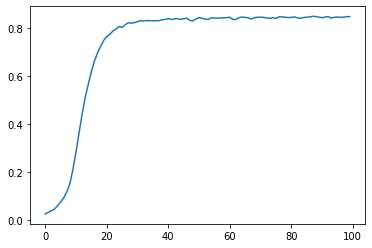

In [53]:
plt.plot(hist.history['accuracy'])

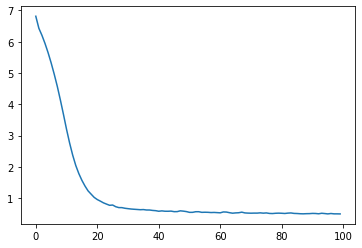

In [54]:
plt.plot(hist.history['loss'])

In [61]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
for i in range(100):
    seq = tokenizer.texts_to_sequences([seed_text])[0]
    pad = pad_sequences([seq],maxlen=len(xs[0]),padding='pre')
    predicted = model.predict_classes(pad)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text = seed_text + " " + output_word
        
        
print(seed_text)
    
    

Help me Obi Wan Kenobi, you're my only hope which in a breast doth lie with me to be not so i to thee in thou sort thee in my heart in it and in a fierce tiger's jaws with flow gather'd cover be me that me i taste doth dwell in heart in mind staineth staineth staineth me in the spring and pride of youth doth weeds is that which in her heart to lie with me to me and me thee i do not thee me me to love thee not my love well the view of a poet's debt of the poet's debt the other of
